In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('lyrics_mood.csv')
df.head()

,file,artist,title,lyrics,tags,mood,year
0,TRABNEX128F92C9DEA.h5,Kings Of Leon,Knocked Up,"I don't care what nobody says, we're gonna hav...","['rock', 'indierock', 'indie', 'SouthernRock',...",0,2007
1,TRAKQXJ128F147A028.h5,AFI,Summer Shudder,"Listen when I say, when I say it's real\nReal ...","['punkrock', 'rock', 'punk', 'emo', 'AFI', 'al...",0,2006
2,TRAYYIN12903CAD8C6.h5,K-OS,Man I Used To Be,"I tried it, I couldn't find it\nNow I just wan...","['Hip-Hop', 'Canadian', 'hiphop', 'k-os', 'rap...",0,2004
3,TRAKHYP128E0792F07.h5,Patty Griffin,Moses,"Diamonds, roses I need Moses\nTo cross this se...","['femalevocalists', 'folk', 'acoustic', 'Alt-c...",0,1996
4,TRAVXII128F92FCC6D.h5,Stephen Marley,Mind Control,"Yeah, yeah, yeah\nNow tell you what\n\nIt's mi...","['reggae', 'stephenmarley', 'rootsreggae', 'ma...",1,2005


In [2]:
data_X = df['lyrics'].values
data_Y = df['mood'].values

### remove lyrics puncuation using proter stemmer

In [3]:
# Porter Stemmer

import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()
def porter_tokenizer(text, stemmer=porter_stemmer):
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct

### build TfidfVectorizer 

In [4]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words="english",
            tokenizer=porter_tokenizer
    )

### build training data and test data

In [5]:
data_X = tfidf.fit_transform(data_X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.35, random_state=0)


In [6]:
import sklearn.metrics as metrics

In [7]:
#define a prediction result report
from sklearn.metrics import classification_report
def prediction_evaluation(model_name,model,test_X,test_Y):
    y_pred = model.predict(test_X)
    cm = metrics.confusion_matrix(test_Y, y_pred)
    plt.figure(figsize=(5,5))
    # resulting confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=["sad","happy"], yticklabels=["sad","happy"])
    
    # classificatioon reprot
    print(classification_report(test_Y, y_pred, target_names = ["sad","happy"]))
    # accuracy reprot
    print("#### {0} accuracy = {1:5.1f}%".format(model_name,100.0 * model.score(test_X, test_Y)))
    
    plt.show()

### Build Naive Bayes Model

In [8]:
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

              precision    recall  f1-score   support

         sad       0.65      0.98      0.78        89
       happy       0.75      0.12      0.20        52

   micro avg       0.66      0.66      0.66       141
   macro avg       0.70      0.55      0.49       141
weighted avg       0.69      0.66      0.57       141

#### MultinomialNB accuracy =  66.0%


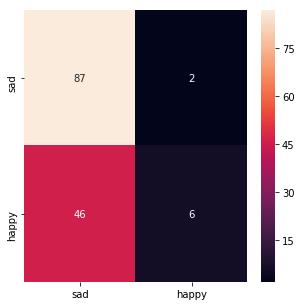

In [9]:
prediction_evaluation("MultinomialNB",clf_NB,X_test,y_test)

## key words change through time

In [10]:
set(df["year"])

{0,
 1956,
 1960,
 1962,
 1963,
 1964,
 1965,
 1966,
 1969,
 1971,
 1972,
 1973,
 1974,
 1975,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010}

In [11]:
lyrics_50s = ""
lyrics_60s = ""
lyrics_70s = ""
lyrics_80s = ""
lyrics_90s = ""
lyrics_00s = ""
for row_id in df.index:
    if df.loc[row_id]['year']>=1950 and df.loc[row_id]['year']<1960:
        lyrics_50s = lyrics_50s+" "+df.loc[row_id]['lyrics']
    if df.loc[row_id]['year']>=1960 and df.loc[row_id]['year']<1970:
        lyrics_60s = lyrics_60s+" "+df.loc[row_id]['lyrics']
    if df.loc[row_id]['year']>=1970 and df.loc[row_id]['year']<1980:
        lyrics_70s = lyrics_70s+" "+df.loc[row_id]['lyrics']
    if df.loc[row_id]['year']>=1980 and df.loc[row_id]['year']<1990:
        lyrics_80s = lyrics_80s+" "+df.loc[row_id]['lyrics']
    if df.loc[row_id]['year']>=1990 and df.loc[row_id]['year']<2000:
        lyrics_90s = lyrics_90s+" "+df.loc[row_id]['lyrics']
    if df.loc[row_id]['year']>=2000 and df.loc[row_id]['year']<2011:
        lyrics_00s = lyrics_00s+" "+df.loc[row_id]['lyrics']
    

## lyrics 50s to 00s

In [12]:
text_file = open("SongLyrics_50.txt", "w")
text_file.write(lyrics_50s)
text_file.close()

In [13]:
text_file = open("SongLyrics_60.txt", "w")
text_file.write(lyrics_60s)
text_file.close()

In [14]:
text_file = open("SongLyrics_70.txt", "w")
text_file.write(lyrics_70s)
text_file.close()

In [15]:
text_file = open("SongLyrics_80.txt", "w")
text_file.write(lyrics_80s)
text_file.close()

In [16]:
text_file = open("SongLyrics_90.txt", "w")
text_file.write(lyrics_90s)
text_file.close()

In [17]:
text_file = open("SongLyrics_00.txt", "w")
text_file.write(lyrics_00s)
text_file.close()

UnicodeEncodeError: 'charmap' codec can't encode characters in position 188569-188574: character maps to <undefined>

In [18]:
print(lyrics_00s)

 I don't care what nobody says, we're gonna have a baby
Taking off in a Coupe de Ville, she's buckled up on navy
She don't care what her momma says, no, she's gonna have my baby
I'm taking all I have to take 'cause taking's gonna shape me

People call us renegades 'cause we like living crazy
We like taking on the town because people's getting lazy
I don't care what nobody says, no, I'm gonna be her lover
Always mad and usually drunk, but I love her like no other

And the doctor seems to say he don't know
Where we're gonna go
I'm a ghost and I don't think I quite know
Where we're gonna go
Where we're gonna go

People call us renegades 'cause we like living crazy
We like taking on this town 'cause people's getting lazy
I don't care what nobody says, no, I'm going to be her lover
Always mad and usually drunk, but I love her like no other

And her daddy seems to say he don't know
Where we're gonna go
I'm a ghost and I don't think I quite know
Where we're gonna go
Where we're gonna go
Where

In [19]:
sadSong = df[df["mood"]==0]
happySong = df[df["mood"]==1]
sadSongLyrics=""
haapySongLyrics=""
for row_id in sadSong.index:
    sadSongLyrics = sadSongLyrics+" "+sadSong.loc[row_id]['lyrics']
for row_id in happySong.index:
    haapySongLyrics = haapySongLyrics+" "+happySong.loc[row_id]['lyrics']
    

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

def make_wc(iname,text, title=''):

    wc = WordCloud(background_color="white", max_words=50)

#      generate word cloud
    wc.generate(text)
    wc.to_file("../image/"+iname+".png")

    plt.imshow(wc)
    plt.axis("off")
    plt.title(title, fontsize=24)
    plt.show()
    

## WorldCloud for happy songs and sad songs

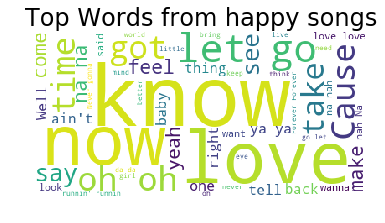

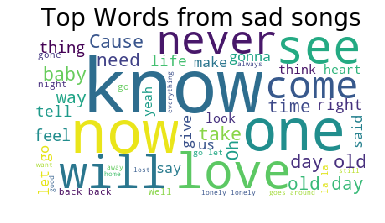

In [21]:
make_wc("happy",haapySongLyrics, 'Top Words from happy songs')
make_wc("sad",sadSongLyrics, 'Top Words from sad songs')

In [22]:
sadSongLyrics50=""
haapySongLyrics50=""
sadSongLyrics60=""
haapySongLyrics60=""
sadSongLyrics70=""
haapySongLyrics70=""
sadSongLyrics80=""
haapySongLyrics80=""
sadSongLyrics90=""
haapySongLyrics90=""
sadSongLyrics00=""
haapySongLyrics00=""

for row_id in sadSong.index:
    if df.loc[row_id]['year']>=1950 and df.loc[row_id]['year']<1960:
        sadSongLyrics50 = sadSongLyrics+" "+sadSong.loc[row_id]['lyrics']
    elif df.loc[row_id]['year']>=1960 and df.loc[row_id]['year']<1970:
        sadSongLyrics60 = sadSongLyrics+" "+sadSong.loc[row_id]['lyrics']
    elif df.loc[row_id]['year']>=1970 and df.loc[row_id]['year']<1980:
        sadSongLyrics70 = sadSongLyrics+" "+sadSong.loc[row_id]['lyrics']
    elif df.loc[row_id]['year']>=1980 and df.loc[row_id]['year']<1990:
        sadSongLyrics80 = sadSongLyrics+" "+sadSong.loc[row_id]['lyrics']
    elif df.loc[row_id]['year']>=1990 and df.loc[row_id]['year']<2000:
        sadSongLyrics90 = sadSongLyrics+" "+sadSong.loc[row_id]['lyrics']
    elif df.loc[row_id]['year']>=2000 and df.loc[row_id]['year']<2010:
        sadSongLyrics00 = sadSongLyrics+" "+sadSong.loc[row_id]['lyrics']
        
for row_id in happySong.index:
    if df.loc[row_id]['year']>=1950 and df.loc[row_id]['year']<1960:
        haapySongLyrics50 = haapySongLyrics+" "+happySong.loc[row_id]['lyrics']
    elif df.loc[row_id]['year']>=1960 and df.loc[row_id]['year']<1970:
        haapySongLyrics60 = haapySongLyrics+" "+happySong.loc[row_id]['lyrics']
    elif df.loc[row_id]['year']>=1970 and df.loc[row_id]['year']<1980:
        haapySongLyrics70 = haapySongLyrics+" "+happySong.loc[row_id]['lyrics']
    elif df.loc[row_id]['year']>=1980 and df.loc[row_id]['year']<1990:
        haapySongLyrics80 = haapySongLyrics+" "+happySong.loc[row_id]['lyrics']
    elif df.loc[row_id]['year']>=1990 and df.loc[row_id]['year']<2000:
        haapySongLyrics90 = haapySongLyrics+" "+happySong.loc[row_id]['lyrics']
    elif df.loc[row_id]['year']>=2000 and df.loc[row_id]['year']<2010:
        haapySongLyrics00 = haapySongLyrics+" "+happySong.loc[row_id]['lyrics']
        

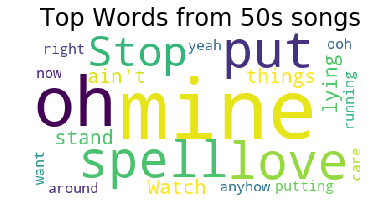

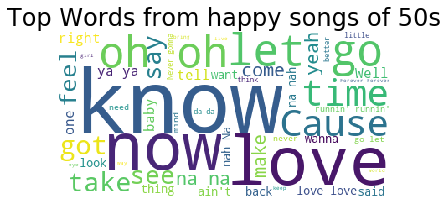

In [23]:
make_wc("50s",lyrics_50s, 'Top Words from 50s songs')

# make_wc("sad_50s",sadSongLyrics50, 'Top Words from sad songs of 50s')
make_wc("happy_50s",haapySongLyrics50, 'Top Words from happy songs of 50s')

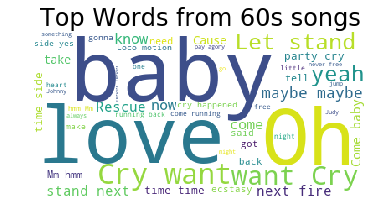

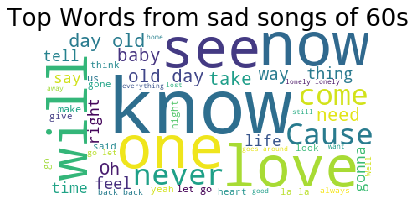

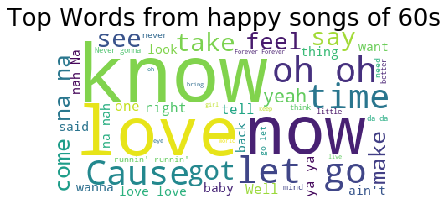

In [24]:
make_wc("60s",lyrics_60s, 'Top Words from 60s songs')

make_wc("sad_60s",sadSongLyrics60, 'Top Words from sad songs of 60s')
make_wc("happy_60s",haapySongLyrics60, 'Top Words from happy songs of 60s')

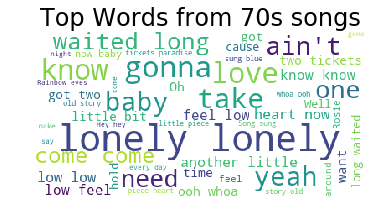

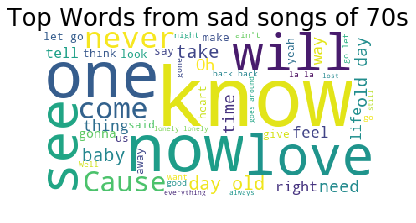

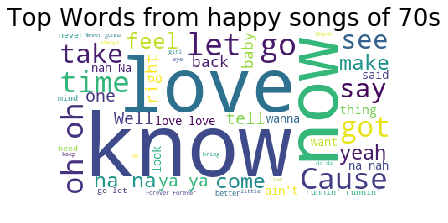

In [25]:
make_wc("70s",lyrics_70s, 'Top Words from 70s songs')

make_wc("sad_70s",sadSongLyrics70, 'Top Words from sad songs of 70s')
make_wc("happy_70s",haapySongLyrics70, 'Top Words from happy songs of 70s')

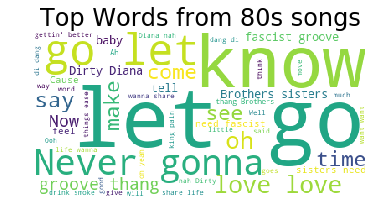

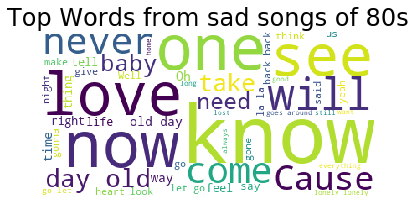

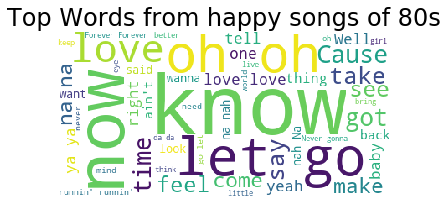

In [26]:
make_wc("80s",lyrics_80s, 'Top Words from 80s songs')

make_wc("sad_80s",sadSongLyrics80, 'Top Words from sad songs of 80s')
make_wc("happy_80s",haapySongLyrics80, 'Top Words from happy songs of 80s')

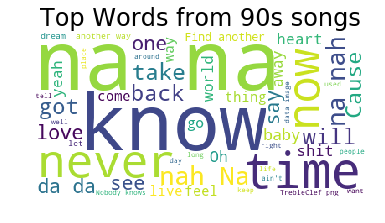

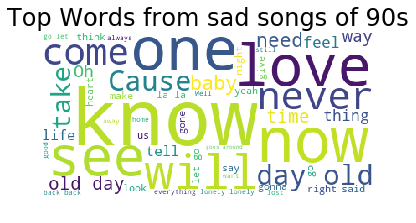

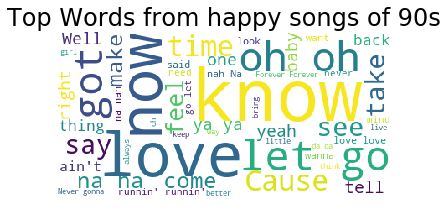

In [27]:
make_wc("90s",lyrics_90s, 'Top Words from 90s songs')

make_wc("sad_90s",sadSongLyrics90, 'Top Words from sad songs of 90s')
make_wc("happy_90s",haapySongLyrics90, 'Top Words from happy songs of 90s')

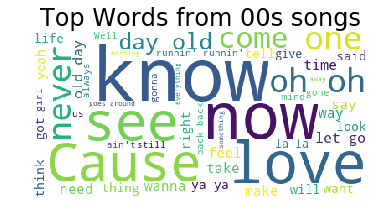

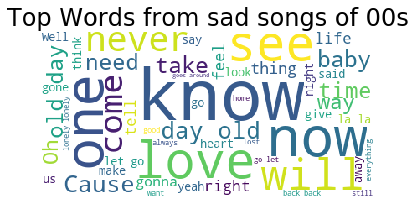

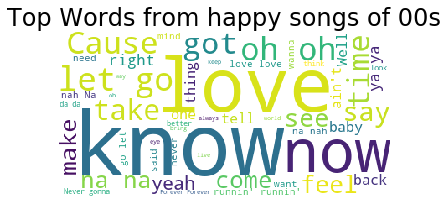

In [28]:
make_wc("00s",lyrics_00s, 'Top Words from 00s songs')

make_wc("sad_00s",sadSongLyrics00, 'Top Words from sad songs of 00s')
make_wc("happy_00s",haapySongLyrics00, 'Top Words from happy songs of 00s')

## Most frequent words from 50s to 00s

50s:   oh; mine; love; spell; put;

60s:   baby; want; cry; time; want; oh; love;

70s:   lonaly; gonna; know; now; baby;

80s:   let; go; know; one; will;

90s:   time; na; love; know; never; 

00s:   love; cause; know; see; oh oh;